## Redução de Dimensionalidade e Seleção de atributos

Foi visto anteriormente sobre a redução de dimensionalidade, onde algoritmos não-supervisionados (como o PCA) são capazes de condensar informações em um número menor de dimensão. No entanto, uma confusão que normalmente acontece com as terminologias, é a distinção entre selecionar atributos e reduzir dimensionalidade. Obviamente que a seleção de atributos acarretará em um número menor de dimensões, mas diferente da redução de dimensionalidade, a seleção de atributos descarta atributos que não são julgados como relevante para o problema, enquanto a redução condensa a informação em um espaço com menos dimensões.

---

Será utilizado o dataset digits conhecido no meio de aprendizado de máquina, importado diretamente do Scikit-Learn. Em seguida, serão aplicados PCA e seleção de atributos para analisar a diferença entre eles.

In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [2]:
# import matplotlib.pyplot as plt 
# plt.gray()
# plt.matshow(cancer.images[25]) 
# plt.show()
#print(digits.target[25])

A função PCA importada de dentro do scikit-learn depende basicamente do atributo n_components. Esse atributo pode ser especificado como um inteiro, onde descreverá o número de componentes desejado, ou um valor contínuo entre 0 e 1, indicando o percentual de variância que deseja ser mantido no resultado final. O parâmetro whiten realiza uma operação matemática no sinal dos vetores extraídos no processo do PCA, e pode melhorar o resultado.

In [3]:
pca = PCA(n_components=0.99, whiten=True)

X_pca = pca.fit_transform(X)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_pca.shape[1])

Número original de atributos: 30
Número reduzido de atributos: 2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=142)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))

#######

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=142)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados reduzidos (PCA em tudo):', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))

#######



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=142)

pca = PCA(n_components=0.99, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais (PCA da parte certa):', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))


Acurácia nos dados originais: 0.9508771929824561
              precision    recall  f1-score   support

     classe2       0.93      0.93      0.93       107
     classe1       0.96      0.96      0.96       178

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285

Acurácia nos dados reduzidos (PCA em tudo): 0.9228070175438596
              precision    recall  f1-score   support

     classe2       0.94      0.85      0.89       107
     classe1       0.91      0.97      0.94       178

    accuracy                           0.92       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285

Acurácia nos dados originais (PCA da parte certa): 0.9228070175438596
              precision    recall  f1-score   support

     classe2       0.94      0.85      0.89       107
     classe1       0.91      0.97      0.94       178



### Seleção de atributos

A seleção de atributos não é um processo não-supervisionado, igual a redução de dimensionalidade. É feita uma análise diretamente relacionada com o rótulo da amostra, portanto é supervisionado. Uma das estratégias mais comuns de seleção de atributos é teste de valor ANOVA. Esse teste identifica se existe algum valor significamente diferente da relação entre atributo e rótulo. Os atributos que são muito diferentes nessa relação, podem ser descartados.

Lembrando sempre de não dar informações do teste para a seleção de atributos, para não virar um tipo de trapaça.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=142)

fvalue_selector = SelectKBest(f_classif, k=20)
X_kbest = fvalue_selector.fit_transform(X_train, y_train)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_kbest.shape[1])

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
model.fit(X_kbest, y_train)
X_test_kbest = fvalue_selector.transform(X_test)
y_pred = model.predict(X_test_kbest)
print('Acurácia nos dados Kbest:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))

Número original de atributos: 30
Número reduzido de atributos: 20
Acurácia nos dados originais: 0.9508771929824561
              precision    recall  f1-score   support

     classe2       0.93      0.93      0.93       107
     classe1       0.96      0.96      0.96       178

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285

Acurácia nos dados Kbest: 0.9543859649122807
              precision    recall  f1-score   support

     classe2       0.94      0.93      0.94       107
     classe1       0.96      0.97      0.96       178

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))


precision    recall  f1-score   support

     classe2       0.92      0.89      0.90       107
     classe1       0.93      0.96      0.94       178

    accuracy                           0.93       285
   macro avg       0.93      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



Os resultados devem ser comparados entre a acurácia nos dados originais e a acurácia com a redução de dimensionalidade ou com a seleção dos atributos. Além de olhar para os resultados também é importante notar a redução de dimensionalidade, já que isso pode levar a processos mais rápidos.

## Exercícios

(1) Explore as configurações do PCA, utilizando números fixos de componentes e outros valores contínuos para a variância, e verifique se é possível obter melhores resultados utilizando a regressão logística e a separação de dados da forma como está.

(2) Explore o número de atributos na função KBest, variando sistematicamente, para provar que há ou não há um resultado melhor.

---

**Template para plotar gráfico comparando os resultados, caso queira:**

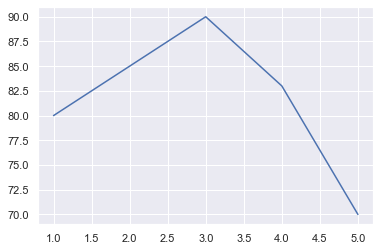

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plot_x = [1,2,3,4,5] # valores que vão no eixo X
plot_y = [80,85,90,83,70] # valores que vão no eixo Y
    
ax = sns.lineplot(x=np.array(plot_x), y=np.array(plot_y))
